<a href="https://colab.research.google.com/github/BoskoVujanovicIT52-2019/PPPO/blob/main/PPPO_IT52_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasifikacija fotografija**

Klasifikacija fotografija predstavlja nadgledani zadatak mašinskog učenja dodeljivanja (najverovatnije) oznake ulaznoj fotografiji iz fiksnog skupa oznaka (kategorija). Ovo je jedan od osnovnih problema u obradi fotografija koji ima veliki broj praktičnih primena. Štaviše, mnogi drugi naizgled različiti zadaci obrade fotografija (poput otkrivanja i segmentacije objekata) mogu se svesti na klasifikaciju fotografija.

Klasifikacija fotografija odnosi se na postupak dodeljivanja oznake (odnosno klasifikovanja) fotografiji na osnovu njenog vizuelnog sadržaja. Na primer, može se razviti algoritam binarne klasifikacije fotografija (model) da bi se predvidelo da li se čovek nalazi na fotografiji.

Za projektni zadatak dobila sam dataset koji se sastoji od 4 foldera, od kojih je jedan images folder gde su smestene fotografije za treniranje.

U projektu je korisceno 5 algoritama za klasifikaciju, a to su:
1. SGD Classifier
2. Random Forest Classifier
3. XGB Classifier
4. KNeighbors Classifier
5. SVM

Prvo je unzipovan folder koji sam dobio kao zadatak kao i povezan colab sa drajvom, tačnije sa folderom sa podacima.

Učitavanje dataseta postavljenog na Google Drive potrebnog za izradu projektnog zadatka:

Ovaj kod uvozi drive modul iz google.colab paketa i zatim montira vaš Google Drive na putanji '/content/gdrive'. Kada pokrenete ovaj kod, bićete zamoljeni da se autentifikujete i odobrite pristup svom Google Drive nalogu. Nakon uspešne autentifikacije, vaša Google Drive će biti dostupna u Colab okruženju i moći ćete pristupiti svojim fajlovima.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Ovaj kod koristi komandu unzip sa prefiksom ! da bi se direktno izvršila komanda iz shell-a u Colab okruženju. Putanja specificirana unutar navodnika treba da pokaže na lokaciju zip fajla koji želite da raspakujete.

In [ ]:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/4.zip"

unzip:  cannot find or open /content/gdrive/MyDrive/Colab Notebooks/4.zip, /content/gdrive/MyDrive/Colab Notebooks/4.zip.zip or /content/gdrive/MyDrive/Colab Notebooks/4.zip.ZIP.


U ovom kodu se uvoze sledeći moduli:

numpy kao np za numeričke izračune.
pandas kao pd za obradu podataka, uključujući unos/izlaz CSV fajlova.
Takođe se uvozi modul os za rad sa operativnim sistemom, posebno za operacije sa direktorijumima i fajlovima.

Zatim se koristi for petlja da bi se prošlo kroz direktorijum /content/gdrive/MyDrive/Colab Notebooks (1)/4 i njegove poddirektorijume. Za svaki fajl koji se susretne, ispisuje se puna putanja koristeći os.path.join(dirname, filename).

Ovo vam omogućava da iterirate kroz fajlove u tom direktorijumu i vršite operacije nad njima.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Colab Notebooks (1)/4'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

U ovom kodu se uvozi modul zipfile.

Zatim se koristi blok "with" za otvaranje zip arhive "/content/gdrive/MyDrive/Colab Notebooks (1)/sample_submission.csv.zip".

Nakon toga se koristi metoda extractall() da bi se izvršilo raspakivanje svih fajlova iz arhive. Ova metoda raspakuje sve fajlove iz zip arhive u trenutni direktorijum.

In [ ]:
import zipfile

with zipfile.ZipFile('/content/gdrive/MyDrive/Colab Notebooks (1)/sample_submission.csv.zip') as z_samp:
    z_samp.extractall()

In [ ]:
import zipfile

with zipfile.ZipFile('/content/gdrive/MyDrive/Colab Notebooks (1)/images.zip') as z_samp:
    z_samp.extractall()

In [ ]:
import zipfile

with zipfile.ZipFile('/content/gdrive/MyDrive/Colab Notebooks (1)/test.csv.zip') as z_samp:
    z_samp.extractall()

In [ ]:
import zipfile

with zipfile.ZipFile('/content/gdrive/MyDrive/Colab Notebooks (1)/train.csv.zip') as z_samp:
    z_samp.extractall()

Ova linija koda koristi se za dobijanje liste svih datoteka i direktorijuma u trenutnom direktorijumu. Kada se izvrši ova komanda, vratiće se lista imena datoteka i direktorijuma koji se nalaze u trenutnom radnom direktorijumu.

In [ ]:
os.listdir()

['.config',
 'test.csv',
 'train.csv',
 'images',
 'gdrive',
 'sample_submission.csv',
 'sample_data']

Ova linija koda koristi se za dobijanje broja datoteka i direktorijuma koji se nalaze unutar direktorijuma "images". Funkcija os.listdir('images') vraća listu imena datoteka i direktorijuma unutar direktorijuma "images", a funkcija len() se koristi za izračunavanje broja elemenata u toj listi.

In [ ]:
len(os.listdir('images'))

1584

U ovom kodu se uvoze moduli matplotlib.pyplot kao plt, cv2 kao cv i load_img iz tensorflow.keras.utils.

Zatim se kreira figura za prikazivanje slika sa dimenzijama 20x15.

U petlji se nasumično bira jedna datoteka iz direktorijuma "images" pomoću funkcije np.random.choice(os.listdir('images')).

Zatim se kreira podgrafik u matrici 5x5 pomoću plt.subplot(5,5,i+1).

Slika se učitava pomoću funkcije load_img(os.path.join('images',j)) i prikazuje se pomoću plt.imshow(img).

Ovaj kod prikazuje 25 nasumično odabranih slika iz direktorijuma "images".






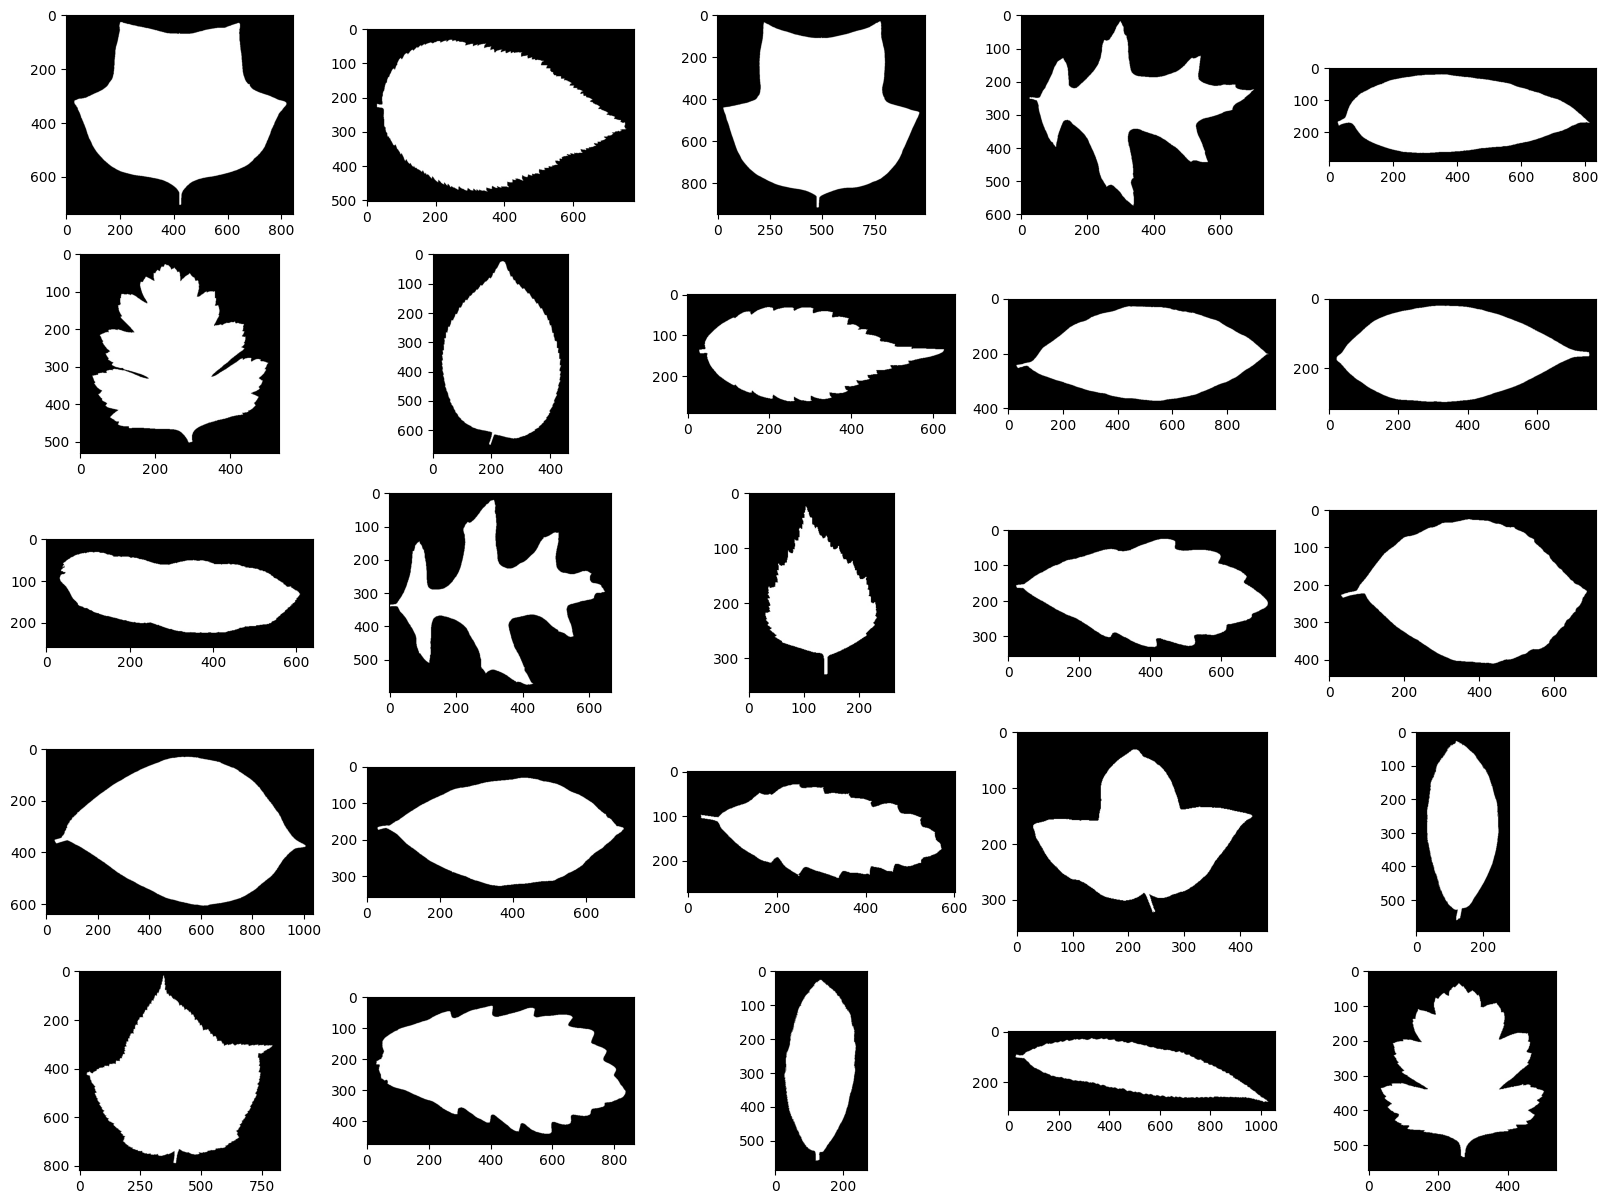

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from tensorflow.keras.utils import load_img
for i in range(25):
    j=np.random.choice((os.listdir('images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('images',j))
    plt.imshow(img)

In [ ]:
!pip install  keras

Ovaj kod koristi funkciju read_csv() iz pandas modula da bi se učitali podaci iz CSV fajlova "train.csv" i "test.csv".

Podaci se učitavaju u DataFrame objekte df i dftest. Parametar index_col=False se koristi da se indeks kolone ne koristi kao prva kolona podataka.

In [ ]:
df=pd.read_csv('train.csv',index_col=False)
dftest=pd.read_csv('test.csv',index_col=False)

Ova linija koda se koristi za prikaz prvih nekoliko redova DataFrame objekta "df". Metoda head() prikazuje podatke sa početka DataFrame-a, podrazumevano prvih 5 redova.

In [ ]:
df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


Ova linija koda prikazuje DataFrame objekat "dftest" koji sadrži podatke učitane iz CSV fajla "test.csv". Prikazivanje samo naziva DataFrame objekta u interaktivnoj konzoli će rezultirati prikazom tabularnih podataka iz DataFrame-a.

In [ ]:
dftest

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


U ovom kodu se uvoze moduli LabelEncoder i StratifiedShuffleSplit iz sklearn.preprocessing i sklearn.model_selection, redom.

Zatim se kreira objekat LabelEncoder() koji će se koristiti za kodiranje ciljnih klasa. Metoda fit() se poziva na objektu encoder kako bi se obučio na podacima iz df.species.

Nakon toga, metoda transform() se koristi za kodiranje ciljnih klasa iz df.species u numeričke labele.

Metoda classes_ se koristi za dobijanje liste jedinstvenih klasa koje su kodirane.

Ovim se pripremaju oznake i klase za dalju obradu i modeliranje.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


encoder=LabelEncoder()
le=encoder.fit(df.species)
labels=le.transform(df.species)
classes=list(le.classes_)

In [ ]:
print(classes)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [ ]:
print(dftest.columns)

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)


U ovom kodu se vrše operacije nad DataFrame-ovima df i dftest.

Linija "df=df.drop(['id','species'],axis=1)" se koristi za izbacivanje kolona 'id' i 'species' iz DataFrame-a df. Parametar axis=1 označava da se kolone izbacuju.

Linija "test_id=dftest.id" se koristi za čuvanje vrednosti kolone 'id' iz DataFrame-a dftest u promenljivoj test_id.

Linija "dftest=dftest.drop(['id'],axis=1)" se koristi za izbacivanje kolone 'id' iz DataFrame-a dftest. Ponovo se koristi parametar axis=1 da bi se specificiralo da se kolona izbacuje.

In [ ]:
df=df.drop(['id','species'],axis=1)
test_id=dftest.id
dftest=dftest.drop(['id'],axis=1)

In [ ]:
dftest

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


Ova linija koda se koristi za prikazivanje informacija o DataFrame objektu "df". Metoda info() prikazuje osnovne informacije o DataFrame-u, uključujući broj redova i kolona, nazive kolona, broj nenull vrednosti u svakoj koloni i tip podataka svake kolone.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB


Ova linija koda se koristi za prikazivanje informacija o DataFrame objektu "dftest". Metoda info() prikazuje osnovne informacije o DataFrame-u, uključujući broj redova i kolona, nazive kolona, broj nenull vrednosti u svakoj koloni i tip podataka svake kolone.

In [ ]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB


Ova linija koda se koristi za ispisivanje broja elemenata u listi "labels". Komanda f-string (f'...') se koristi za formatiranje teksta, a len(labels) se koristi za dobijanje broja elemenata u listi "labels".

In [ ]:
print(f'Labels:',len(labels))

Labels: 990


Ova linija koda koristi funkciju np.unique() za dobijanje jedinstvenih vrednosti iz liste "labels". Rezultat se čuva u promenljivoj "uniquelabels".

Zatim se koristi funkcija print() za ispisivanje vrednosti "uniquelabels" na konzolu. Ova linija koda će prikazati jedinstvene vrednosti iz liste "labels".

In [ ]:
uniquelables=np.unique(labels)
print(uniquelables)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


Podela na validacione (test) i trening podatke
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.20, shuffle=True, stratify=labels)

U ovom kodu se koristi funkcija train_test_split() iz modula sklearn.model_selection za podelu podataka na trening i validacione (test) skupove.

Podaci se dele na osnovu DataFrame objekta "df" i liste "labels".

Parametar test_size=0.20 određuje veličinu validacionog skupa koji će biti 20% od ukupnog skupa podataka.

Parametar shuffle=True se koristi za mešanje podataka pre podela.

Parametar stratify=labels se koristi za osiguravanje da raspodela klasa u trening i validacionom skupu bude proporcionalna raspodeli klasa u celom skupu podataka.

Rezultat podela se čuva u promenljivim X_train, X_test, y_train i y_test koje predstavljaju trening i validacione podatke za obeležavanje i njihove oznake.

In [ ]:
# Split into validation (test) and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df,labels,test_size=0.20,shuffle=True,stratify=labels)

Treniranje koriscenjem SGDClassifier algoritma:


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
model_1 = make_pipeline(StandardScaler(), SGDClassifier())

print(model_1.fit(X_train,y_train))

print(model_1.score(X_test,y_test))


y_pred = model_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
0.9747474747474747
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


Treniranje koriscenjem RandomForestClassifier algoritma:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = make_pipeline(StandardScaler(), RandomForestClassifier())

print(model_2.fit(X_train,y_train))

print(model_2.score(X_test,y_test))

y_pred = model_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])
0.9747474747474747
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


Treniranje koriscenjem KneighborsClassifier algoritma:

In [ ]:
from sklearn import neighbors
model_3 = make_pipeline(StandardScaler(), neighbors.KNeighborsClassifier())

print(model_3.fit(X_train,y_train))

print(f'score Model:',model_3.score(X_test,y_test))

y_pred = model_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])
score Model: 0.9696969696969697
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


Treniranje koriscenjem XGBClassifier algoritma:

In [ ]:
import xgboost as xgb
model_4 = make_pipeline(StandardScaler(),xgb.XGBClassifier())

print(model_4.fit(X_train,y_train))

print(f'score Model:',model_4.score(X_test,y_test))

y_pred = model_4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_esti

Treniranje koriscenjem SVM algoritma:

In [ ]:
from sklearn import svm
model_5= make_pipeline(StandardScaler(),svm.SVC(gamma=0.001, C=100.))

print(model_5.fit(X_train,y_train))

print(f'score Model:',model_5.score(X_test,y_test))

y_pred = model_5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001))])
score Model: 0.9848484848484849
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
models = pd.DataFrame({
    'Model': ['SGDClassifier','Random Forest Classifier','K Neighbors Classifier', 'XGB Classifier',
              'svm'],

    'Score': [model_1.score(X_test,y_test)*100,
              model_2.score(X_test,y_test)*100,
              model_3.score(X_test,y_test)*100,
              model_4.score(X_test,y_test)*100,
              model_5.score(X_test,y_test)*100]})
models.sort_values(by='Score', ascending=True)

,Model,Score
3,XGB Classifier,88.383838
2,K Neighbors Classifier,96.969697
0,SGDClassifier,97.474747
1,Random Forest Classifier,97.474747
4,svm,98.484848


In [ ]:
test_pred = model_5.predict(dftest)

In [ ]:
print(test_pred)

[51 50  1 19 14  3  3 28 84  8 43 74 75 10 52 46 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 74 47 50  4 36 14 55 36 93  8 32  8  9 71 70 38 23
 94 18 17  5 55 94 14 86 62 33 51 98 88 56 21 59 65 11 48  5 13  4 54 57
 29  7 31 98 92 84 25 10 61 43 85 24  1  2 23 83 40 22 48 90 25 21 37 56
 41 95  7 89 98 77  3 12 31 84 53 96 64 72 93 93 67 30  8 88 60 87  6 57
 34 90 60 17 75 27 51 31 39 23 68  2 41 61 24 97 29 28 68 81 42 51 86 62
 60 52 95 64 42 96 95 20 59 35 86  1 26 38 43 75 20 60 46 79 22 79 69 87
 65 97 75 21 29 21 11 10 58 94 27 22 15 45 89 54 43  5 23 94 40 49 89 72
 36 11 81 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 92 13  2 59  0 96
 70 32 29 78 91 55 44 38  5 60 49 58 94 67 92 88 90 79 25 37 18  0 76 27
 70 71 44 70 32 90 30 82 34 30 82 96 48 65 57 64 26 53 55 73  9  3 83 26
 30 63 17 22 79 63 12 78 36 14 27 25 67 38 20 54 76 69 67 97 80 44 92 69
 23 21 16 51 33 77 16 11 97  1 52 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 38 87 95  3 35 83 60 59 58  0 50 62 38 93 68 55

In [ ]:
sample_df=pd.read_csv('sample_submission.csv',index_col=False)
print(sample_df)

       id  Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  \
0       4         0.010101         0.010101   0.010101     0.010101   
1       7         0.010101         0.010101   0.010101     0.010101   
2       9         0.010101         0.010101   0.010101     0.010101   
3      12         0.010101         0.010101   0.010101     0.010101   
4      13         0.010101         0.010101   0.010101     0.010101   
..    ...              ...              ...        ...          ...   
589  1576         0.010101         0.010101   0.010101     0.010101   
590  1577         0.010101         0.010101   0.010101     0.010101   
591  1579         0.010101         0.010101   0.010101     0.010101   
592  1580         0.010101         0.010101   0.010101     0.010101   
593  1583         0.010101         0.010101   0.010101     0.010101   

     Acer_Palmatum  Acer_Pictum  Acer_Platanoids  Acer_Rubrum  Acer_Rufinerve  \
0         0.010101     0.010101         0.010101     0.010101     

In [ ]:
output = pd.DataFrame({'Id': test_id,

                       'Labels': test_pred})
output.to_csv('submission.csv', index=False)
output.head()

,Id,Labels
0,4,51
1,7,50
2,9,1
3,12,19
4,13,14


In [ ]:
final=pd.concat([output,sample_df],axis=1)
final.head()

,Id,Labels,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,51,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,50,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,1,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,19,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
4,13,14,13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
